# Assignment 2 - Machine Learning Basics

## *Ruiqi Wang*
Netid:  *rw195*

Github link: *https://github.com/Ruiqi22Wang/machine-learning-course*

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**
1. To make full use of the informatino in the larger sample size, it is better to use a flexible method here to decrease the bias.
2. An inflexible approach here woule be bette. Small numbers of observations means high risks of overfittig, thus a flexible method would not be appropriate.
3. Highly non-linear relationship is a classic case that flexible method would perform better, beacuse it does not remove a lot of possibilites or potentials of the model.
4. Since the variance of the error terms is very high, the risk of overfitting would be high, too. Therefore, an inflexible model would be better.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER** <br>
(a) <br>(i) This is a regression problem since the purpose is to find the quantitative relationship between the salaries and the predictors. <br> (ii) Since what we are interested in is to identify the factors that have impacts on the salary, the inference is the focus in this problem. <br> (iii) The sample size is the number of the firms, which is 500. Thre are 3 predictors. <br><br>
(b) <br>(i) This is a classification problem as the outcome is to whether success or failure. <br> (ii) We are interested in the future success and failure, which is, prediction. <br>  (iii) The sample size is the number of similar products, which is 20. The number of predictors is 13.<br><br>
(c)<br> (i) This is a regression problem since the purpose is to see the relationship between the change in the US dollar and the outcome would be the value of it. <br> (ii) We are mostly interested in the prediction of the value of the change in USD. <br> (iii) The sample size is 52 (the number of weeks in 2012). The number of predictors is 3.

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

In [6]:
# (a) Write your own kNN classifier

import numpy as np

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.x = None
        self.y = None
        
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x = x
        self.y = y
        
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        threshold = .5
        for test in x:
            dist = []
            for training in self.x:
                dist.append(np.sqrt(np.sum((test-training)**2)))
            dist_k = (sorted(dist)[:k])
            sum = 0
            for i in range(k):
                sum += self.y[dist.index(dist_k[i])] 
            if sum/k > threshold:
                y_hat.append(1)
            else:
                y_hat.append(0)
            
        # Return the estimated targets
        return y_hat

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

In [7]:
# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
# (b)
x_test_high = np.loadtxt('data/A2_X_test_high.csv', delimiter = ',')
x_test_low = np.loadtxt('data/A2_X_test_low.csv', delimiter = ',')
x_train_high = np.loadtxt('data/A2_X_train_high.csv', delimiter = ',')
x_train_low = np.loadtxt('data/A2_X_train_low.csv', delimiter = ',')
y_test_high = np.loadtxt('data/A2_Y_test_high.csv', delimiter = ',')
y_test_low = np.loadtxt('data/A2_Y_test_low.csv', delimiter = ',')
y_train_high = np.loadtxt('data/A2_Y_train_high.csv', delimiter = ',')
y_train_low = np.loadtxt('data/A2_Y_train_low.csv', delimiter = ',')

In [8]:
# time the predictions of each
#(c)
import time
knn = Knn()

start = time.time()
knn.fit(x_train_low, y_train_low)
ylow = knn.predict(x_test_low, 5)
end = time.time()
time1 = end - start
print('Time consumed by my algorithm for low demensional data is {:.3f}s'.format(time1))
print('The accuracy by my algorithm for low demensional data is {:.3f}'.format(accuracy(y_test_low, ylow)),'\n')

start = time.time()
knn.fit(x_train_high, y_train_high)
yhigh = knn.predict(x_test_high, 5)
end = time.time()
time2 = end - start
print('Time consumed by my algorithm for high demensional data is {:.3f}s'.format(time2))
print('The accuracy by my algorithm for high demensional data is {:.3f}'.format(accuracy(y_test_high, yhigh)))

Time consumed by my algorithm for low demensional data is 9.825s
The accuracy by my algorithm for low demensional data is 0.925 

Time consumed by my algorithm for high demensional data is 9.746s
The accuracy by my algorithm for high demensional data is 0.993


In [9]:
#(d)
from sklearn.neighbors import KNeighborsClassifier as skknn
skn = skknn(5)

start = time.time()
skn.fit(x_train_low, y_train_low)
ylowsk = skn.predict(x_test_low)
end = time.time()
time3 = end - start 
print('Time consumed by sklearn for low demensional data is {:.3f}s'.format(time3))
print('The accuracy by sklearn for low demensional data is {:.3f}'.format(accuracy(y_test_low, ylowsk)),'\n')

start = time.time()
skn.fit(x_train_high, y_train_high)
yhighsk = skn.predict(x_test_high)
end = time.time()
time4 = end - start
print('Time consumed by sklearn for high demensional data is {:.3f}s'.format(time4))
print('The accuracy by sklearn for high demensional data is {:.3f}'.format(accuracy(y_test_high, yhighsk)),'\n')
print('Sklearn is {:.3f}'.format(time1/time3), ' times faster than my algorithm for low dimensional data.'  )
print('Sklearn is {:.3f}'.format(time2/time4), ' times faster than my algorithm for high dimensional data.'  )

Time consumed by sklearn for low demensional data is 0.022s
The accuracy by sklearn for low demensional data is 0.925 

Time consumed by sklearn for high demensional data is 0.191s
The accuracy by sklearn for high demensional data is 0.993 

Sklearn is 454.900  times faster than my algorithm for low dimensional data.
Sklearn is 51.133  times faster than my algorithm for high dimensional data.


According to the results above, the accurcy for my method and sklearn's are the same. However, the speed of sklearn is much faster than mine. For high demensional data, it is about 51 times faster, and for low dimension data, it is about 455 times faster.

**(e)**<br>
There always has to be a tradeoff between the speed of trainging and testing. In many cases, it would be more harmful to have a slow process of prediction than training. The reason for this is that we always need quicker response to the update of the data or the information, etc. If the response time to new information is slow, we can not get real time or timely feedback from the information, which is possible to give birth to all kinds of problem such as business loss, wrong decisons due to the time gap, and so on.

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

**ANSWER**: 

In [10]:
#(a)
import numpy as np
from pandas import DataFrame as DF

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

newx = [0,0,0]
edist = []
for x in X:
    edist.append(np.sqrt(np.sum((x-newx)**2)))

df = DF(data = {'Obs.' :[1,2,3,4,5,6], 'y' : y, 'ED' : edist})
df.set_index('Obs.', inplace=True)
df.columns.name = df.index.name
df.index.name = None
df

Obs.,y,ED
1,r,3.000000
2,r,2.000000
3,r,3.162278
4,b,2.236068
5,b,1.414214
6,r,1.732051


In [11]:
#(b)(c)
from statistics import mode

def find_color(y, k):
    color = mode(y[edist.index(sorted(edist)[k-1])])
    if color == 'b':
        color = 'Blue'
    else:
        color = 'Red'
    print('The prediction with K=', k, 'is',color )

find_color(y,1)
find_color(y,3)


The prediction with K= 1 is Blue
The prediction with K= 3 is Red


**(b)**
K=1 means to find the nearest 1 neighbor, thus the neighbor chosen should be the one with the least ED, which is Obs.5 with y as Blue. Therefore, our prediction would be Blue.

**(c)**
K=3 means to find the nearest 3 neighbors, thus the neighbor chosen should be the ones with the least three EDs, which are Obs.5, Obs.6, Obs.2, whith y as Blue, Red, Red correspondingly. Therefore, our prediction would be the "average" of the three ys, which is Red.

**(d)**
If the Bayes decision boundary is highly nonlinear, that means the nature of the data is of high variance. Therefore we should lower the flexibility. In other words, we should expect a K to be relatively small.


## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

In [1]:
#(a)
from sklearn.datasets import make_moons

data = make_moons(n_samples=1000, noise=0.35, random_state = 42)
x = data[0]; x1 = x[:,0]; x2 = x[:,1]
y = data[1]

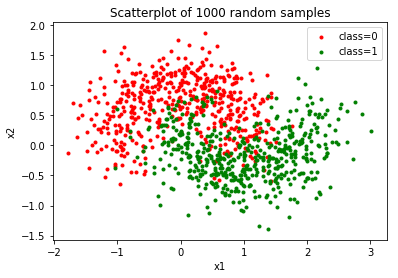

In [16]:
#(b)
import matplotlib.pyplot as plt

plt.scatter(x1[y==0], x2[y==0],c='red',label='class=0', marker = '.')
plt.scatter(x1[y==1], x2[y==1],c='green',label='class=1', marker= '.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatterplot of 1000 random samples')
plt.legend()
plt.show()

In [17]:
#(c)
import numpy as np
import numpy.random as rd
from sklearn.neighbors import KNeighborsClassifier

sub1 = rd.choice(1000,100)
sub2 = rd.choice(1000,100)
sub3 = rd.choice(1000,100)
xsub1 = x[sub1]; ysub1 = y[sub1]
xsub2 = x[sub2]; ysub2 = y[sub2]
xsub3 = x[sub3]; ysub3 = y[sub3]


def knnresult(x,y,k):
    knn = KNeighborsClassifier(k)
    knn.fit(x,y)
    x1min = x[:,0].min()-1; x1max = x[:,0].max()+1
    x2min = x[:,1].min()-1; x2max = x[:,1].max()+1
    testx1, testx2 = np.meshgrid(np.arange(x1min,x1max,0.02), np.arange(x2min,x2max,0.02))
    testx = np.c_[testx1.ravel(), testx2.ravel()]
    pred = knn.predict(testx)
    return testx, pred

In [18]:
x1_1, y1_1 = knnresult(xsub1, ysub1, 1)
x1_25, y1_25 = knnresult(xsub1, ysub1, 25)
x1_50, y1_50 = knnresult(xsub1, ysub1, 50)

x2_1, y2_1 = knnresult(xsub2, ysub2, 1)
x2_25, y2_25 = knnresult(xsub2, ysub2, 25)
x2_50, y2_50 = knnresult(xsub2, ysub2, 50)

x3_1, y3_1 = knnresult(xsub3, ysub3, 1)
x3_25, y3_25 = knnresult(xsub3, ysub3, 25)
x3_50, y3_50 = knnresult(xsub3, ysub3, 50)

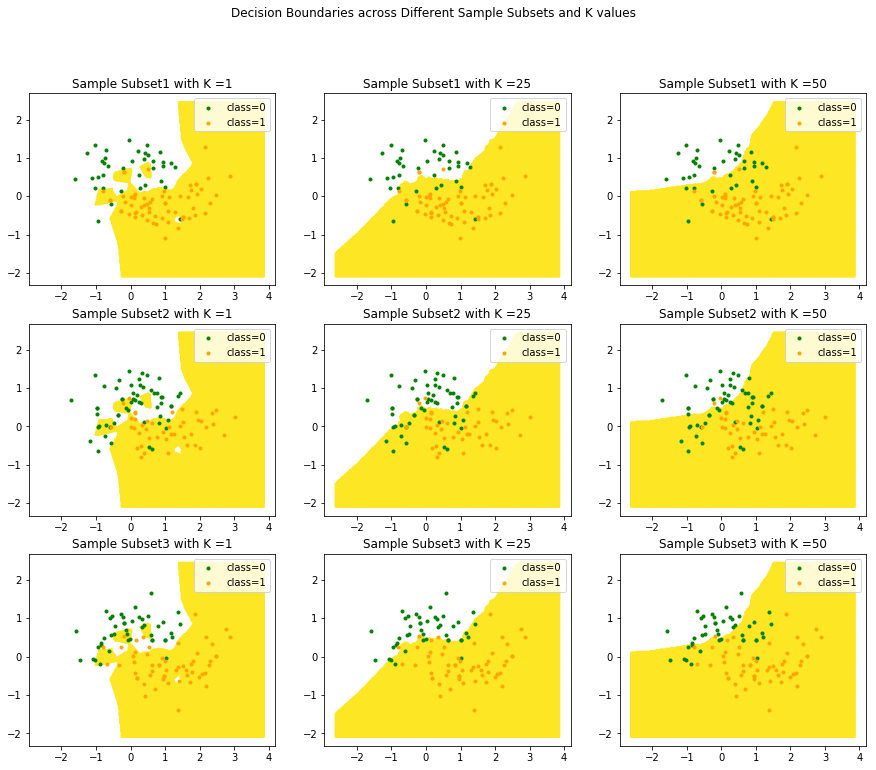

In [19]:
#(d)
import matplotlib.pyplot as plt
from matplotlib import cm

def knnplot(loc, x, y, predx, predy, s, k):
    x1 = x[:,0]; x2 = x[:,1]
    predx1 = predx[:,0]; predx2 = predx[:,1]
    loc.scatter(predx1, predx2, predy, c = predy)
    loc.scatter(x1[y==0], x2[y==0], c = 'green', label = 'class=0', marker = '.')
    loc.scatter(x1[y==1], x2[y==1], c = 'orange', label = 'class=1',marker = '.')
    loc.legend()
    loc.set_title('Sample Subset{0} with K ={1}'.format(s,k))
    
fig, axs = plt.subplots(3, 3, figsize = (15, 12))
knnplot(axs[0,0], xsub1, ysub1, x1_1, y1_1, 1, 1)
knnplot(axs[0,1], xsub1, ysub1, x1_25, y1_25, 1, 25)
knnplot(axs[0,2], xsub1, ysub1, x1_50, y1_50, 1, 50)
knnplot(axs[1,0], xsub2, ysub2, x1_1, y1_1, 2, 1)
knnplot(axs[1,1], xsub2, ysub2, x1_25, y1_25, 2, 25)
knnplot(axs[1,2], xsub2, ysub2, x1_50, y1_50, 2, 50)
knnplot(axs[2,0], xsub3, ysub3, x1_1, y1_1, 3, 1)
knnplot(axs[2,1], xsub3, ysub3, x1_25, y1_25, 3, 25)
knnplot(axs[2,2], xsub3, ysub3, x1_50, y1_50, 3, 50)
fig.suptitle("Decision Boundaries across Different Sample Subsets and K values")
plt.show()

**(e)**
The difference between the rows is due to the different samples (different subsets of the data).  The difference between the column is due to the different values of K. The decision boudaries appears to be best with K=25, as the line is smooth but not too case-sensitive and not too general. The decision boundaries vary the most when K=1 because the test result is according to its one perticualr nearest neighbor.

**(f)**
As we can see from the plots above, as K goes up, the boundary lines turns more smooth, the there are more trainging dots assigned in the woring class. In other words, when we increase K, the flexibility decreases whereas the bias increases, which means we need to tolerant more bias if we want more flexibility, and vice versa.

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

In [20]:
#(a)
training_set = data
trainx = training_set[0]; trainy = training_set[1]

test_set = make_moons(n_samples=1000)
testx = test_set[0]; testy = test_set[1]

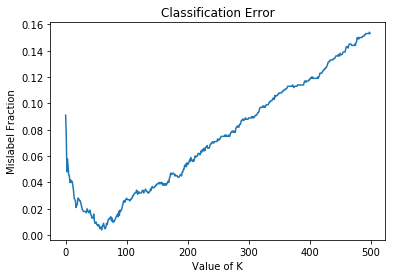

In [21]:
#(b)
from sklearn.neighbors import KNeighborsClassifier

errors = []

for k in range(1,501):
    knn = KNeighborsClassifier(k)
    knn.fit(trainx, trainy)
    y_hat = knn.predict(testx)
    errors.append(1-accuracy(y_hat, testy))
    
plt.plot(errors)
plt.title('Classification Error')
plt.ylabel('Mislabel Fraction')
plt.xlabel('Value of K')
plt.show() 

**(c)**
According to the result, it can be seen that the classfication error starts to drop from K = 1, and continue to drop until it reaches the minumum. This whole process is with fluctuations. 

**(d)**
The larger the value of K, the higher the bia is. At the same time, the smaller the value of K, the higher the variance is. Therefore, the model has the highest bias when K = 500 and the highest variance when K = 1.


In [22]:
#(e)
errors.index(min(errors))

59

**(e)**
From the aspect of the mislabeled rate, we could say that the optimal value of K is 59, because this is where the mislabeled rate reaches its minimum. This is not a very common result as the optimal value of K is often smaller than this in similar situations. The reason for this might be the size, noise and randomness in the sample data. 

**(f)**
Different models have different controls of their flexibility, depending on the nature and features of themselves. In genenral, we can say that high flexibility means more chance to take advantage of the full information. For example, in linear regression model, higher flexibility comes with more coefficients.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

In [23]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

**ANSWER**

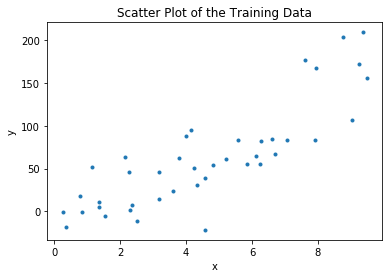

In [24]:
#(a)
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train, marker='.')
plt.title('Scatter Plot of the Training Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [26]:
#(b)
from sklearn.linear_model import LinearRegression as lr

x_train = np.array(x_train).reshape(-1,1); y_train = np.array(y_train).reshape(-1,1)

fit1 = lr().fit(x_train, y_train)

a10 = fit1.intercept_[0]
a11 = fit1.coef_[0][0]
y1hat = fit1.predict(x_train)
r12 = fit1.score(x_train, y_train)
mse1 = np.mean((y1hat-y_train)**2)

print('The equation of the model is y = {:.3f} + {:.3f}x'.format(a10,a11), '\n')

print('The R^2 value of the model is {:.3f}'.format(r12))
print('The mean square error of the fit of the model is {:.3f}'.format(mse1))

The equation of the model is y = -21.731 + 18.303x 

The R^2 value of the model is 0.701
The mean square error of the fit of the model is 1052.585


**(c)**
According to the scatter plot above, I decide to explore the relationship between the outcome and the predictor in the quadratic level beacuse there is some quadratic-like curve in the plot.

In [27]:
x_train2 = np.c_[x_train, x_train**2]

fit2 = lr().fit(x_train2, y_train)

a20 = fit2.intercept_[0]
a21 = fit2.coef_[0][0]
a22 = fit2.coef_[0][1]
y2hat = fit2.predict(x_train2)
r22 = fit2.score(x_train2, y_train)
mse2 = np.mean((y2hat-y_train)**2)

print('The equation of the model is y = {:.3f} + {:.3f}x + {:.3f}x^2'.format(a20,a21,a22), '\n')
print('The R^2 value of the second model is {:.3f}'.format(r22))
print('The mean square error of the fit of the second model is {:.3f}'.format(mse2))

The equation of the model is y = 8.007 + 0.471x + 1.832x^2 

The R^2 value of the second model is 0.749
The mean square error of the fit of the second model is 884.798


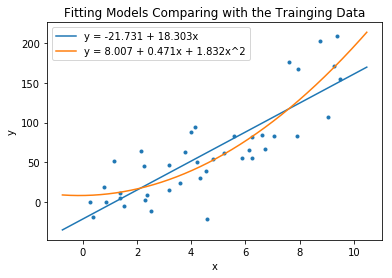

In [28]:
#(d)
xpred = np.linspace(min(x_train)-1,max(x_train)+1, 1000).reshape(-1,1)
x2pred = np.c_[xpred, xpred**2]
ypred = fit1.predict(xpred)
y2pred = fit2.predict(x2pred)

plt.scatter(x_train, y_train, marker='.')
plt.plot(xpred, ypred, label = 'y = {:.3f} + {:.3f}x'.format(a10,a11))
plt.plot(xpred, y2pred, label = 'y = {:.3f} + {:.3f}x + {:.3f}x^2'.format(a20,a21,a22))
plt.title('Fitting Models Comparing with the Trainging Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [29]:
#(e)
xtest = np.array(x_test).reshape(-1,1)
ytest = np.array(y_test).reshape(-1,1)
x2test = np.c_[xtest, xtest**2]
ypredtest = fit1.predict(xtest)
y2predtest = fit2.predict(x2test)

r12test = fit1.score(xtest, ytest)
r22test = fit2.score(x2test, ytest)
mse1test = np.mean((ypredtest-ytest)**2)
mse2test = np.mean((y2predtest-ytest)**2)

print('The R^2 value of the first model on the test data is {:.3f}'.format(r12test))
print('The mean square error of the fit of the first model on the test data is {:.3f}'.format(mse1test), '\n')

print('The R^2 value of the second model on the test data is {:.3f}'.format(r22test))
print('The mean square error of the fit of the second model on the test data is {:.3f}'.format(mse2test))

The R^2 value of the first model on the test data is 0.556
The mean square error of the fit of the first model on the test data is 2023.312 

The R^2 value of the second model on the test data is 0.693
The mean square error of the fit of the second model on the test data is 1398.882


**(f)** On both the training data and the test data, the second model with the quadratic predictors perform better. First, the values of R^2 in the quadratic model are larger on the two data sets, which means the change of the outcome can be more explained by the predictors in the quadratic model. Plus, the mean square errors of the quadratic model are smaller on the two sets, which means the fitting is more accurate given the data. This conclusion also matches the pattern observed from the scatter plot above.

**(g)**
If the test data were significantly different from the training dataset, the predictive capability would be negatively affected. The underlying assumption for the approach of "train and test" is that the training and test datasets share some common patterns or distributions, so that we can then use the "testing data" to examine the performance of the model trained by the "training data". If the testing and training data were significantly different, the result of the tests would not be reliable or even makesense.